Get prepared scores/categories in format: {im_name: {'classes':[], 'scores': []}} to get test cluster vectors

Folowing Wang, L., & Schwing, A. G. (2017). Diverse and Accurate Image Description Using a Variational Auto-Encoder with an Additive Gaussian Encoding Space, (Nips).

In [7]:
import pickle
import numpy as np

In [9]:
TEST_SCORES_FILE = './obj_vectors/test_scores.pickle'
CAT_INDEX_FILE = './obj_vectors/category_index.pickle'
NUM_CLASSES = 90
# include classes, with prob. more than
INCLUDE_PROB = 0.5

In [5]:
def load_pickle(path):
    with open(path, 'rb') as rf:
        return pickle.load(rf)

In [6]:
# dict, ex.{1: {'id': 1, 'name': 'person'}}
cat_index = load_pickle(CAT_INDEX_FILE)
# dict {im_name: {'classes':[], 'scores': []}}
test_scores = load_pickle(TEST_SCORES_FILE)

In [62]:
# prepare class vectors and save them to dict {im_name: [vector]}
test_c_v = {}
for imn in test_scores:
    vector = np.zeros(NUM_CLASSES + 1)
    cl_idx = np.argwhere(np.array(test_scores[imn]['scores'][0]) > INCLUDE_PROB)[:, 0]
    vector[np.array(test_scores[imn]['classes'][0], dtype=int)[cl_idx]] = 1
    test_c_v[imn] = vector/(vector.sum() + 1*(10**-10))

In [67]:
# save to pickle
SAVE_FILE = './obj_vectors/c_v_test.pickle'
with open(SAVE_FILE, 'wb') as wf:
    pickle.dump(test_c_v, wf)

In [41]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
IM_PATH = '/home/luoyy/datasets_large/mscoco/coco/images/test2014/'

COCO_test2014_000000308874.jpg
[ 0.          0.33333333  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.33333333  0.          0.          0.          0.
  0.          0.          0.          0.          0.33333333  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.     

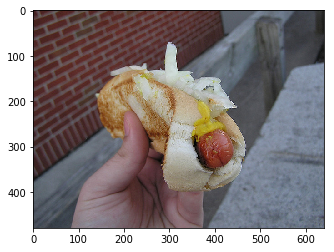

In [66]:
# test
key = list(test_c_v.keys())[1200]
print(key)
print(test_c_v[key])
# load picture, look at classes
image_np = cv2.cvtColor(cv2.imread(os.path.join(IM_PATH, key)), cv2.COLOR_BGR2RGB)
plt.imshow(image_np)
# print classes
classes = np.argwhere(test_c_v[key])
for cl in classes:
    print(cat_index[cl[0]]['name'])